Ejercicio 1 de la sección 2.6. NOTA: SE OBTIENEN LOS MISMOS RESULTADOS QUE EN R, POR LO CUAL NO SE REPITEN EL ANALISIS DE RESULTADOS QUE SE INCLUYO EN EL ARCHIVO DE R. 

**********************************************************************************************
A) Ajustar un modelo de regresión lineal múltiple que relacione la 
cantidad de juegos ganados con las yardas por aire del equipo (x2), 
el porcentaje de jugadas por tierra (x7) y las yardas por tierra del 
contrario (x8). Version utilizando calculos matriciales.
**********************************************************************************************

In [6]:
import pandas as pd
import numpy as np

In [7]:
datos = pd.read_csv('Liga_nacional_de_futbol.csv')
datos.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
1,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
2,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
3,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
4,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866


In [8]:
X = np.column_stack([np.ones(len(datos)),datos['x2'].values,datos['x7'].values,datos['x8'].values])
X[0:4]

array([[1.000e+00, 1.985e+03, 5.970e+01, 2.205e+03],
       [1.000e+00, 2.855e+03, 5.500e+01, 2.096e+03],
       [1.000e+00, 1.737e+03, 6.560e+01, 1.847e+03],
       [1.000e+00, 2.905e+03, 6.140e+01, 1.903e+03]])

In [9]:
y = datos['y'].values.reshape(-1, 1)
y[0:4]

array([[10],
       [11],
       [11],
       [13]])

beta = (XᵀX)⁻¹Xᵀy

In [10]:
beta = np.linalg.pinv(X.T @ X) @ X.T @ y
print('y = ', beta[0][0], '+', beta[1][0], '* x2','+', beta[2][0], '* x7','+', beta[3][0], '* x8')
#y =  -1.808372058706409 + 0.0035980702139767062 * x2 + 0.193960209583232 * x7 + -0.004815493970050336 * x8

y =  -1.8083720546257922 + 0.003598070213803523 * x2 + 0.19396020953988183 * x7 + -0.004815493970611276 * x8


**********************************************************************************************
A) Versión utilizando la función de biblioteca OLS de statsmodels.api
**********************************************************************************************

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
#import statsmodels.formula.api as smf
#import matplotlib.pyplot as plt

In [12]:
X = sm.add_constant(datos[['x2', 'x7', 'x8']])
print('X:\n', X[0:4])
y = datos['y']
print('y:\n', y[0:4])
M1 = sm.OLS(y, X).fit()
print('y = ', M1.params['const'], '+', M1.params['x2'], '* x2','+', M1.params['x7'], '* x7','+', M1.params['x8'], '* x8')
# y =  -1.8083720587049417 + 0.0035980702139766932 * x2 + 0.19396020958322147 * x7 + -0.004815493970050427 * x8
# Los coeficientes coinciden con los obtenidos anteriormente
datos['y_pred'] = M1.predict(X)
datos

X:
    const    x2    x7    x8
0    1.0  1985  59.7  2205
1    1.0  2855  55.0  2096
2    1.0  1737  65.6  1847
3    1.0  2905  61.4  1903
y:
 0    10
1    11
2    11
3    13
Name: y, dtype: int64
y =  -1.8083720587046717 + 0.003598070213976692 * x2 + 0.19396020958321786 * x7 + -0.004815493970050454 * x8


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,y_pred
0,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917,6.295058
1,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575,9.038655
2,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175,8.271048
3,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476,11.389294
4,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866,9.990608
5,11,2309,2927,39.7,74.1,8,786,61.0,1848,2339,11.655719
6,10,2528,2341,38.1,65.4,12,754,66.1,1564,2092,11.904048
7,11,2147,2737,37.0,78.3,-1,761,58.0,1821,1909,10.520224
8,4,1689,1414,42.1,47.6,-3,714,57.0,2577,2001,1.925503
9,2,2566,1838,42.3,54.2,-1,797,58.9,2476,2254,4.305974


**********************************************************************************************
B) Formar la tabla de análisis de varianza y probar la significancia de la regresión.
**********************************************************************************************

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.regression.linear_model import RegressionResults

# Calcular SCT (Suma de Cuadrados Total)
n = len(y)
SCT = np.dot(y.T, y) - np.sum(y)**2 / n

# Calcular SCE (Suma de Cuadrados Explicada por el modelo)
# SCE = β'X'y - (sum(y)^2)/n
SCE = np.dot(np.dot(M1.params.T, X.T), y) - np.sum(y)**2 / n

# Calcular SSE (Suma de Cuadrados del Error)
SSE = SCT - SCE

print("Análisis de varianza:")
print(f"SCT = {SCT:.4f} SCE = {SCE:.4f} SSE = {SSE:.4f}")

# Calcular F0 y p-valor
p = X.shape[1] - 1  # Número de variables predictoras (sin incluir el intercepto)
F0 = (SCE / p) / (SSE / (n - p - 1))

# Grados de libertad
GLT = n - 1
GLRes = M1.df_resid  # Grados de libertad residuales
GLR = GLT - GLRes    # Grados de libertad de la regresión

print(f"\nn = {n} GLT = {GLT} GLRes = {GLRes} GLR = {GLR}")

# Calcular F crítico y p-valor
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, GLR, GLRes)
pv = 1 - stats.f.cdf(F0, GLR, GLRes)

print(f"\nF0 = {F0} F_crit = {F_crit} p_valor = {pv}")
# F0 = 29.436870318643965 F_crit = 3.0087865704473615 p_valor = 3.273458282215813e-08

# Interpretación
print(f"\nInterpretación:")
if F0 > F_crit:
    print("Rechazo H0: Al menos un coeficiente es significativamente diferente de cero")
else:
    print("No rechazo H0: No hay evidencia de que los coeficientes sean diferentes de cero")

if pv < alpha:
    print(f"El modelo es estadísticamente significativo (p < {alpha})")
else:
    print(f"El modelo no es estadísticamente significativo (p ≥ {alpha})")
# Interpretación:
# Rechazo H0: Al menos un coeficiente es significativamente diferente de cero
# El modelo es estadísticamente significativo (p < 0.05)

# Método usando el summary de statsmodels
print("\n" + "="*78)
print("RESUMEN COMPLETO DEL MODELO:")
print(M1.summary())

Análisis de varianza:
SCT = 326.9643 SCE = 257.0943 SSE = 69.8700

n = 28 GLT = 27 GLRes = 24.0 GLR = 3.0

F0 = 29.43687031864384 F_crit = 3.0087865704473615 p_valor = 3.273458282215813e-08

Interpretación:
Rechazo H0: Al menos un coeficiente es significativamente diferente de cero
El modelo es estadísticamente significativo (p < 0.05)

RESUMEN COMPLETO DEL MODELO:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     29.44
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           3.27e-08
Time:                        21:08:56   Log-Likelihood:                -52.532
No. Observations:                  28   AIC:                             113.1
Df Residuals:                      24   BIC:                             118.4


**********************************************************************************************
C) Calcular el estadístico t para probar las hipótesis H0:β2=0, H0:β7=0 y H0:β8=0. 
 ¿Qué conclusiones se pueden sacar acerca del papel de las variables x2, x7 y x8 en el modelo?
**********************************************************************************************

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Calcular SSE (Suma de Cuadrados del Error) usando residuos
SSE = np.sum(M1.resid**2)
print(f"SSE = {SSE:.4f}")

# Calcular sigma² (varianza del error)
n = len(y)
p = X.shape[1] - 1  # número de variables predictoras (sin intercepto)
sigma2 = SSE / (n - p - 1)
print(f"sigma² = {sigma2:.4f}")

# Calcular (X'X)⁻¹
XtX = np.dot(X.T, X)
XtX_inv = np.linalg.inv(XtX)

# Calcular matriz de varianzas-covarianzas
vcov_matrix = sigma2 * XtX_inv
print("Matriz de varianzas-covarianzas:")
print(vcov_matrix)

# Calcular errores estándar
std_errors = np.sqrt(np.diag(vcov_matrix))
print("\nErrores estándar:")
print(std_errors)

# Obtener los coeficientes
coeficientes = M1.params
print(f"\nCoeficientes: {coeficientes.values}")

# Calcular estadísticos t
t_values = coeficientes / std_errors
print(f"\nEstadísticos t:\n {t_values}")

# Grados de libertad residuales
df_residual = n - p - 1
print(f"Grados de libertad residuales: {df_residual}")

# Calcular p-values (prueba bilateral)
p_values = 2 * stats.t.sf(np.abs(t_values), df=df_residual)
print(f"\np-values: {p_values}")

# Crear tabla de resultados
resultados = pd.DataFrame({
    'Coeficiente': coeficientes,
    'Std Error': std_errors,
    't-value': t_values,
    'p-value': p_values
})

print("\nTabla de coeficientes:")
print(resultados.round(6))

# Comparar con summary de statsmodels para verificar
print("\n" + "="*50)
print("COMPARACIÓN CON SUMMARY DE STATSMODELS:")
print(M1.summary().tables[1])

# Pruebas de hipótesis individuales con nivel de significancia alpha = 0.05
alpha = 0.05
print(f"\nPruebas de hipótesis individuales (α = {alpha}):")
for i, (coef_name, p_val) in enumerate(zip(coeficientes.index, p_values)):
    if p_val < alpha:
        print(f"{coef_name}: p-value = {p_val:.6f} → Rechazamos H0 (significativo)")
    else:
        print(f"{coef_name}: p-value = {p_val:.6f} → No rechazamos H0 (no significativo)")

# Método alternativo usando directamente los resultados de statsmodels
print("\n" + "="*50)
print("USANDO VALORES DIRECTOS DE STATSMODELS:")
print(f"Coeficientes: {M1.params.values}")
print(f"Std Errors: {M1.bse.values}")
print(f"t-values: {M1.tvalues.values}")
print(f"p-values: {M1.pvalues.values}")

SSE = 69.8700
sigma² = 2.9113
Matriz de varianzas-covarianzas:
[[ 6.24235793e+01 -2.65170022e-03 -6.63118941e-01 -8.58414322e-03]
 [-2.65170022e-03  4.83022986e-07  1.95446431e-05  2.31048918e-07]
 [-6.63118941e-01  1.95446431e-05  7.78514148e-03  7.99859169e-05]
 [-8.58414322e-03  2.31048918e-07  7.99859169e-05  1.63064801e-06]]

Errores estándar:
[7.90085940e+00 6.94998551e-04 8.82334488e-02 1.27696829e-03]

Coeficientes: [-1.80837206  0.00359807  0.19396021 -0.00481549]

Estadísticos t:
 const   -0.228883
x2       5.177090
x7       2.198262
x8      -3.771036
dtype: float64
Grados de libertad residuales: 24

p-values: [8.20899046e-01 2.65572266e-05 3.78151621e-02 9.37769913e-04]

Tabla de coeficientes:
       Coeficiente  Std Error   t-value   p-value
const    -1.808372   7.900859 -0.228883  0.820899
x2        0.003598   0.000695  5.177090  0.000027
x7        0.193960   0.088233  2.198262  0.037815
x8       -0.004815   0.001277 -3.771036  0.000938

COMPARACIÓN CON SUMMARY DE STATSMOD

**********************************************************************************************
D) Calcular R2 y R2adj para este modelo.
**********************************************************************************************

In [15]:
import numpy as np
import pandas as pd

# Datos básicos
n = len(datos)
p = len(M1.params) - 1  # número de variables predictoras (sin intercepto)

# Valores predichos
y_pred = M1.predict(X)

# SST usando fórmula matricial
y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2)

# SSE usando fórmula matricial
SSE = np.sum((y - y_pred)**2)

# SSR usando fórmula matricial
SSR = np.sum((y_pred - y_mean)**2)

R2 = SSR / SST
R2_adj = 1 - ((1 - R2) * (n - 1) / (n - p - 1))

print(f"SST = {SST} SSE = {SSE} SSR = {SSR}")
print(f"R2 = {R2:.6f} R2 ajustado = {R2_adj:.6f}")
#SST = 326.9642857142857 SSE = 69.8700041817221 SSR = 257.0942815325637
#R2 = 0.786307 R2 ajustado = 0.759595

# Verificar con los valores de statsmodels
print(f"\nVerificación con statsmodels:")
print(f"R2 de M1 = {M1.rsquared} R2 ajustado de M1 = {M1.rsquared_adj}")
#Verificación con statsmodels:
#R2 de M1 = 0.7863069233109538 R2 ajustado de M1 = 0.759595288724823

# Interpretación
print(f"\nINTERPRETACIÓN:")
print(f"El modelo explica el {R2*100:.1f}% de la variabilidad en la variable y")
print(f"El R2 ajustado ({R2_adj*100:.1f}%) considera el número de predictores")
#INTERPRETACIÓN:
#El modelo explica el 78.6% de la variabilidad en la variable y
#El R2 ajustado (76.0%) considera el número de predictores

SST = 326.9642857142857 SSE = 69.87000418172208 SSR = 257.09428153256295
R2 = 0.786307 R2 ajustado = 0.759595

Verificación con statsmodels:
R2 de M1 = 0.7863069233109538 R2 ajustado de M1 = 0.759595288724823

INTERPRETACIÓN:
El modelo explica el 78.6% de la variabilidad en la variable y
El R2 ajustado (76.0%) considera el número de predictores


**********************************************************************************************
E) Trazar una gráfica de probabilidad normal de los residuales. 
 ¿Parece haber algún problema con la hipótesis de normalidad?
**********************************************************************************************

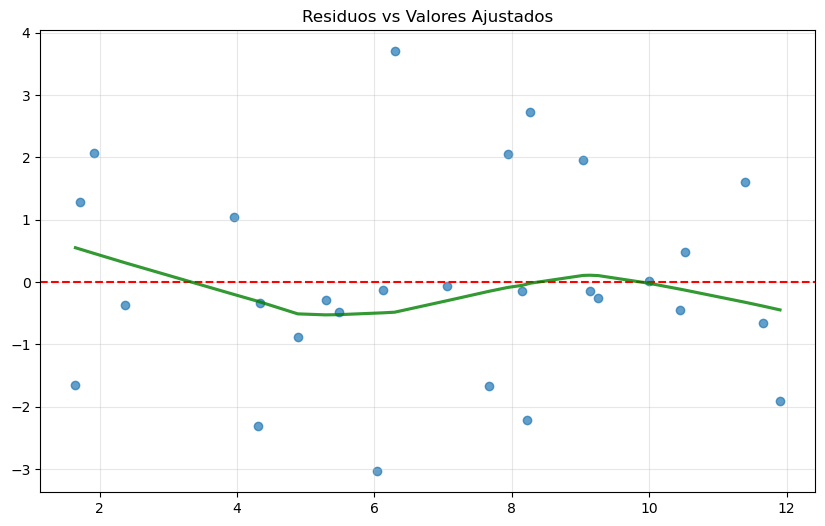

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Gráfico de residuos vs valores ajustados (equivalente a which=1 en R)
def plot_residuals_vs_fitted(model):
   # Valores ajustados y residuos
    fitted_values = model.fittedvalues
    residuals = model.resid    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted_values, residuals, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.title('Residuos vs Valores Ajustados')
    plt.grid(True, alpha=0.3)
    # Añadir línea de tendencia suavizada (loess)
    sns.regplot(x=fitted_values, y=residuals, scatter=False, lowess=True, 
                line_kws={'color': 'green', 'alpha': 0.8})
    plt.show()

plot_residuals_vs_fitted(M1)

In [17]:
from scipy import stats

# Test de Shapiro-Wilk (equivalente a shapiro.test())
def shapiro_test_residuals(model):
    residuals = model.resid    
    # Realizar test de Shapiro-Wilk
    stat, p_value = stats.shapiro(residuals)
    print("Test de Normalidad de Shapiro-Wilk:")
    print(f"Estadístico W = {stat:.6f}")
    print(f"Valor p = {p_value:.6f}")
    # Interpretación
    alpha = 0.05
    if p_value > alpha:
        print("No se rechaza H0: Los residuos siguen una distribución normal")
    else:
        print("Se rechaza H0: Los residuos NO siguen una distribución normal")
    return stat, p_value

shapiro_stat, shapiro_p = shapiro_test_residuals(M1)
#Test de Normalidad de Shapiro-Wilk:
#Estadístico W = 0.965083
#Valor p = 0.456557
#No se rechaza H0: Los residuos siguen una distribución normal


Test de Normalidad de Shapiro-Wilk:
Estadístico W = 0.965083
Valor p = 0.456557
No se rechaza H0: Los residuos siguen una distribución normal


**********************************************************************************************
F) Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.
**********************************************************************************************

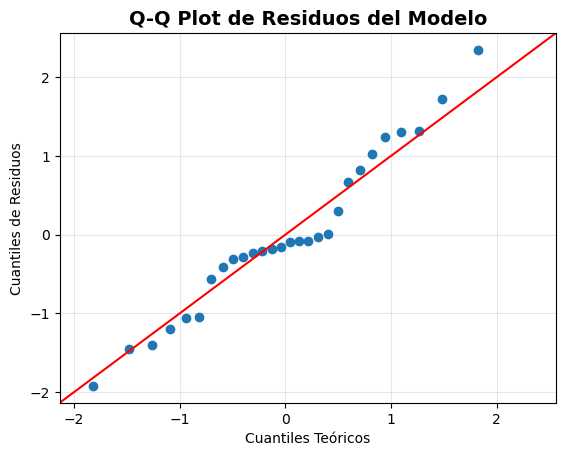

In [18]:
from statsmodels.graphics.gofplots import qqplot

# Q-Q Plot (which=2) - Normalidad
residuals = M1.resid
qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot de Residuos del Modelo', fontsize=14, fontweight='bold')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Residuos')
plt.grid(True, alpha=0.3)
plt.show()

**********************************************************************************************
G) Trazar las gráficas de los residuales en función de cada una de las variables regresoras. 
 ¿Implican esas gráficas que se especificó en forma correcta el regresor?
**********************************************************************************************

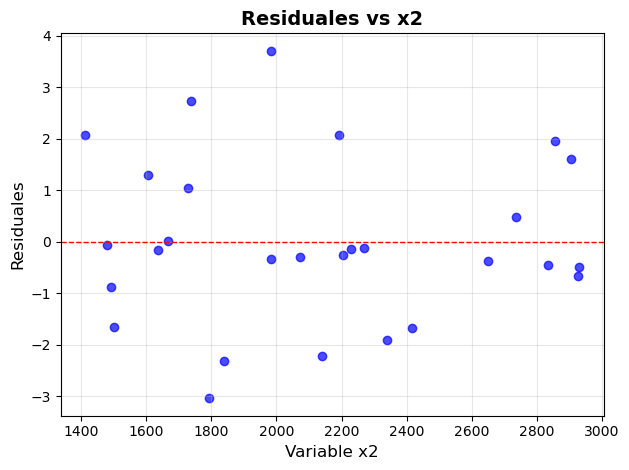

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Código equivalente en Python
#plt.figure(figsize=(10, 6))
plt.scatter(datos['x2'], M1.resid, marker='o', color='blue', alpha=0.7)
plt.title('Residuales vs x2', fontsize=14, fontweight='bold')
plt.xlabel('Variable x2', fontsize=12)
plt.ylabel('Residuales', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # línea en y=0
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

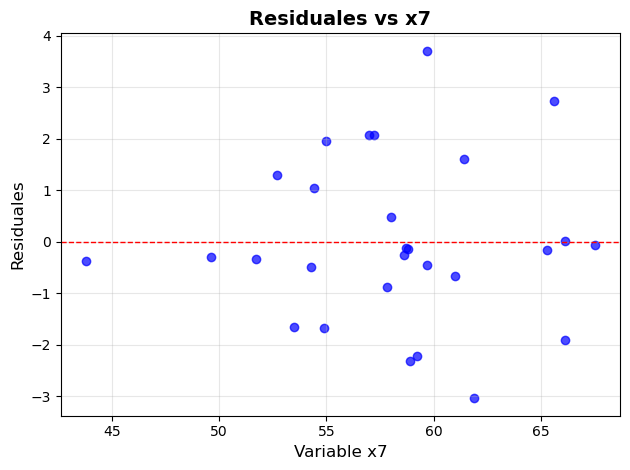

In [20]:
# Código equivalente en Python
#plt.figure(figsize=(10, 6))
plt.scatter(datos['x7'], M1.resid, marker='o', color='blue', alpha=0.7)
plt.title('Residuales vs x7', fontsize=14, fontweight='bold')
plt.xlabel('Variable x7', fontsize=12)
plt.ylabel('Residuales', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # línea en y=0
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

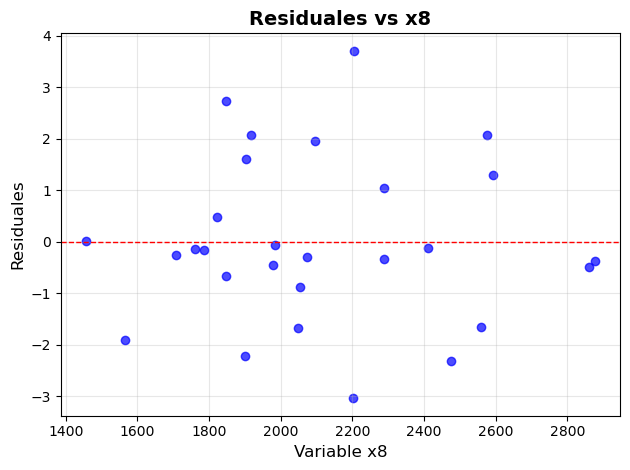

In [21]:
# Código equivalente en Python
#plt.figure(figsize=(10, 6))
plt.scatter(datos['x8'], M1.resid, marker='o', color='blue', alpha=0.7)
plt.title('Residuales vs x8', fontsize=14, fontweight='bold')
plt.xlabel('Variable x8', fontsize=12)
plt.ylabel('Residuales', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # línea en y=0
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**********************************************************************************************
H) Calcular un intervalo de confianza de 95% para β7
**********************************************************************************************

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Realizado antes
#M1 = sm.OLS(y, X).fit()

# Obtener coeficiente y error estándar de x7
coef_x7 = M1.params['x7']
se_x7 = M1.bse['x7']

# Grados de libertad residuales
df_res = M1.df_resid

# Valor crítico t (95% de confianza, bilateral)
from scipy import stats
t_critico = stats.t.ppf(0.975, df_res)

# Límites del intervalo para x7
limite_inferior = coef_x7 - t_critico * se_x7
limite_superior = coef_x7 + t_critico * se_x7

print(f"Intervalo para x7: [{limite_inferior}, {limite_superior}]")

# Otra forma utilizando la función conf_int() para todos los coeficientes
conf_int_all = M1.conf_int(alpha=0.05)
conf_int_all.columns = ['2.5 %', '97.5 %']
print("\nIntervalos de confianza para todos los coeficientes:")
print(conf_int_all)

# Información adicional del modelo
print("\nResumen completo del modelo:")
print(M1.summary())

# También puedes obtener los resultados específicos como en R
print(f"\nCoeficiente de x7: {coef_x7}")
print(f"Error estándar de x7: {se_x7}")
print(f"Valor t de x7: {M1.tvalues['x7']}")
print(f"Valor p de x7: {M1.pvalues['x7']}")

Intervalo para x7: [0.011855321567684235, 0.3760650975987515]

Intervalos de confianza para todos los coeficientes:
           2.5 %     97.5 %
const -18.114944  14.498200
x2      0.002164   0.005032
x7      0.011855   0.376065
x8     -0.007451  -0.002180

Resumen completo del modelo:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     29.44
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           3.27e-08
Time:                        21:26:43   Log-Likelihood:                -52.532
No. Observations:                  28   AIC:                             113.1
Df Residuals:                      24   BIC:                             118.4
Df Model:                           3                                         
Cov

**********************************************************************************************
H) Calcular un intervalo de confianza de 95% para la cantidad media de juegos 
  ganados por un equipo cuando x2=2300, x7=56 y x8=2100
**********************************************************************************************

In [26]:
import numpy as np
import pandas as pd
from scipy import stats

# Valores específicos para la predicción
x2_val = 2300
x7_val = 56  
x8_val = 2100

# 1. Vector de características (incluye intercepto)
x_vector = np.array([1, x2_val, x7_val, x8_val])  # 1 para el intercepto

# 2. Coeficientes del modelo
beta_hat = M1.params.values

# 3. Estimación puntual
y_hat = np.dot(x_vector, beta_hat)

# 4. Error estándar de la estimación media
X = M1.model.exog  # Matriz de diseño original
X_new = x_vector.reshape(1, -1)  # Nueva observación

# Matriz de varianza-covarianza (convertir a array numpy)
sigma2 = M1.mse_resid  # σ² = MSE
var_beta = M1.cov_params().values  # ¡CONVERTIR A NUMPY ARRAY!

# Error estándar para la media
se_mean = np.sqrt(X_new @ var_beta @ X_new.T)[0, 0]

# 5. Valor crítico t
t_critical = stats.t.ppf(0.975, M1.df_resid)

# 6. Intervalo de confianza
lower_bound = y_hat - t_critical * se_mean
upper_bound = y_hat + t_critical * se_mean

print(f"Estimación puntual: {y_hat}")
print(f"Intervalo de confianza 95% para la respuesta media: [{lower_bound}, {upper_bound}]")

# Método más simple y recomendado usando statsmodels
# Crear DataFrame con los nuevos datos
nuevos_datos = pd.DataFrame({ 'const': [1], 'x2': [x2_val], 'x7': [x7_val], 'x8': [x8_val]})

# Asegurarse de que el orden de columnas sea el mismo que en el modelo
#nuevos_datos = nuevos_datos[['const', 'x2', 'x7', 'x8']]

# Intervalo de confianza para la respuesta MEDIA usando predict
ic_media = M1.get_prediction(nuevos_datos).summary_frame(alpha=0.05)

print("\nUsando función predict de statsmodels:")
print("Intervalo de confianza 95% para la respuesta media:")
print(ic_media)

# Método alternativo más robusto
# simplemente usar los valores directamente en el formato correcto
print("\nMétodo directo con get_prediction:")

# Crear array con los valores en el orden correcto (const, x2, x7, x8)
nuevos_datos_array = np.array([[1, x2_val, x7_val, x8_val]])

# Obtener predicción
prediction = M1.get_prediction(nuevos_datos_array)
prediction_summary = prediction.summary_frame(alpha=0.05)

print(prediction_summary)
print(f"\nEstimación puntual: {prediction_summary['mean'].values[0]}")
print(f"Límite inferior: {prediction_summary['mean_ci_lower'].values[0]}")
print(f"Límite superior: {prediction_summary['mean_ci_upper'].values[0]}")

Estimación puntual: 7.216423832995966
Intervalo de confianza 95% para la respuesta media: [6.436202776657201, 7.996644889334731]

Usando función predict de statsmodels:
Intervalo de confianza 95% para la respuesta media:
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  7.216424  0.378033       6.436203       7.996645      3.609523   

   obs_ci_upper  
0     10.823324  

Método directo con get_prediction:
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  7.216424  0.378033       6.436203       7.996645      3.609523   

   obs_ci_upper  
0     10.823324  

Estimación puntual: 7.216423832995966
Límite inferior: 6.436202776657207
Límite superior: 7.996644889334726


**********************************************************************************************
I) Ajustar un modelo a esos datos, usando solo x7 y x8 como regresores y probar 
   la significancia de la regresión
**********************************************************************************************

In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Realizar la regresión con solo x7 y x8
X2 = sm.add_constant(datos[['x7', 'x8']])  # const + x7 + x8
y = datos['y']

# Ajustar el modelo
M2 = sm.OLS(y, X2).fit()

# Mostrar resultados equivalentes a print(m2) en R
print("Resultados de la regresión: y ~ x7 + x8")
print("=" * 50)
print(M2.summary())

# Para obtener un output más similar al de R
print("\n" + "=" * 50)
print("Coeficientes:")
print(M2.params)

Resultados de la regresión: y ~ x7 + x8
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     15.13
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           4.93e-05
Time:                        21:49:03   Log-Likelihood:                -63.031
No. Observations:                  28   AIC:                             132.1
Df Residuals:                      25   BIC:                             136.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

**********************************************************************************************
J) Calcular R2 y R2adj. Compararlos con los resultados del modelo anterior.
**********************************************************************************************

In [28]:
print(f"\nR-cuadrado: {M2.rsquared:.4f}")
print(f"R-cuadrado ajustado: {M2.rsquared_adj:.4f}")
print(f"Estadístico F: {M2.fvalue:.4f}")
print(f"Valor p de F: {M2.f_pvalue:.4e}")


R-cuadrado: 0.5477
R-cuadrado ajustado: 0.5115
Estadístico F: 15.1343
Valor p de F: 4.9349e-05


**********************************************************************************************
K) Calcular un intervalo de confianza de 95% para β7.
**********************************************************************************************

In [29]:
# Obtener intervalos de confianza del 95% para todos los coeficientes
conf_int_all = M2.conf_int(alpha=0.05)

# Renombrar las columnas para que coincidan con el output de R
conf_int_all.columns = ['2.5 %', '97.5 %']

print("Intervalos de confianza 95% para todos los coeficientes:")
print(conf_int_all)


Intervalos de confianza 95% para todos los coeficientes:
          2.5 %     97.5 %
const -2.367848  38.256485
x7    -0.197164   0.293906
x8    -0.010156  -0.002917


**********************************************************************************************
K) También un intervalo de confianza de 95% para la cantidad media de juegos 
   ganados por un equipo cuando x7=56 y x8=2100
**********************************************************************************************

In [31]:
X_new = np.array([[1, 56, 2100]])  # [const, x7, x8]

prediccion = M2.get_prediction(X_new)
ic_media = prediccion.summary_frame(alpha=0.05)

print("Intervalo de confianza 95% para la respuesta media:")
print(f"fit: {ic_media['mean'].values[0]:.6f}")
print(f"lwr: {ic_media['mean_ci_lower'].values[0]:.6f}")
print(f"upr: {ic_media['mean_ci_upper'].values[0]:.6f}")


Intervalo de confianza 95% para la respuesta media:
fit: 6.926243
lwr: 5.828643
upr: 8.023842


**********************************************************************************************
 L) ¿Qué conclusiones se pueden sacar de este problema, acerca de las consecuencias
     de omitir un regresor importante de un modelo?

MISMA RESPUESTA QUE EN R:
La confiabilidad de las predicciones del modelo se degradan. El modelo no logra explicar apropiadamente la variabilidad de los datos. 